In [1]:
import os
import collections
import numpy as np
import pandas as pd
import sklearn.metrics
import matplotlib.pyplot as plt

In [2]:
def report_predict(y_pred, y_preds, y_true, times=None, ax=None, pre=''):
    if times is None:
        times = [e for e in range(len(y_pred))]
    if ax is None:
        fig, ax = plt.subplots(1, 1)
    if pre:
        pre += '_'
    
    # p = sklearn.metrics.classification_report(y_pred=y_pred, y_true=y_true)
    # print(p)

    f1 = np.zeros(y_preds.shape[0])
    recall = np.zeros(y_preds.shape[0])
    accuracy = np.zeros(y_preds.shape[0])
    
    for j, y_pred in enumerate(y_preds):
        f1[j] = sklearn.metrics.f1_score(y_pred=y_pred, y_true=y_true, pos_label=1)
        recall[j] = sklearn.metrics.recall_score(y_pred=y_pred, y_true=y_true, pos_label=1)
        accuracy[j] = sklearn.metrics.accuracy_score(y_pred=y_pred, y_true=y_true)

    ax.plot(times, f1, label='{}f1'.format(pre))
    ax.plot(times, recall, label='{}recall'.format(pre))
    ax.plot(times, accuracy, label='{}accuracy'.format(pre))
    
    return sklearn.metrics.classification_report(y_pred=y_pred, y_true=y_true, output_dict=True)

In [3]:
jsons = [os.path.join('.', e) for e in sorted(os.listdir('.')) if all([e.startswith('MVPA'), e.endswith('json')])]
dfs_MEG = dict()
dfs_EEG = dict()
for fname in jsons:
    print('-' * 80)
    exper = fname[-12:-5]
    print(exper)
    if exper.startswith('MEG'):
        dfs_MEG[exper] = pd.read_json(fname)
    if exper.startswith('EEG'):
        dfs_EEG[exper] = pd.read_json(fname)
df = pd.read_json(fname)
freqs = df.index
times = df['times'][freqs[0]]
freqs

--------------------------------------------------------------------------------
EEG_S01
--------------------------------------------------------------------------------
EEG_S02
--------------------------------------------------------------------------------
EEG_S03
--------------------------------------------------------------------------------
EEG_S04
--------------------------------------------------------------------------------
EEG_S05
--------------------------------------------------------------------------------
EEG_S06
--------------------------------------------------------------------------------
EEG_S07
--------------------------------------------------------------------------------
EEG_S08
--------------------------------------------------------------------------------
EEG_S09
--------------------------------------------------------------------------------
EEG_S10
--------------------------------------------------------------------------------
MEG_S01
---------------------

Index(['Delta', 'Theta', 'Alpha', 'Cb_U07', 'Cb_U30'], dtype='object')

--------------------------------------------------------------------------------
Delta
--------------------------------------------------------------------------------
Theta
--------------------------------------------------------------------------------
Alpha
--------------------------------------------------------------------------------
Cb_U07
--------------------------------------------------------------------------------
Cb_U30
--------------------------------------------------------------------------------
Delta
--------------------------------------------------------------------------------
Theta
--------------------------------------------------------------------------------
Alpha
--------------------------------------------------------------------------------
Cb_U07
--------------------------------------------------------------------------------
Cb_U30


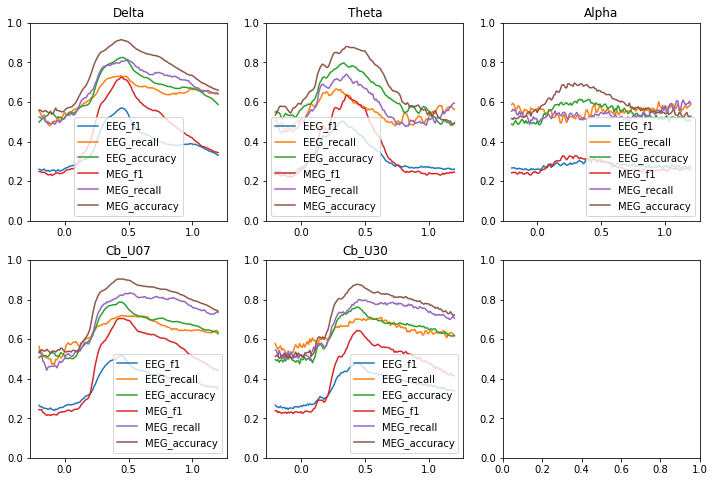

In [4]:
rname = 'mean_summary.html'

with open(rname, 'w') as f:
    f.write('Good Luck.')

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12, 8))
axes = axes.ravel()
for exp, dfs in zip(['EEG', 'MEG'], [dfs_EEG, dfs_MEG]):
    for j, freq in enumerate(freqs):
        print('-' * 80)
        print(freq)
        y_true = np.concatenate([np.array(df['y_true'][freq]) for df in dfs.values()])
        y_pred = np.concatenate([np.array(df['y_predict'][freq]) for df in dfs.values()])
        y_pred_time = np.concatenate([np.array(df['y_time_predict'][freq]) for df in dfs.values()])

        p = report_predict(y_pred, y_pred_time.transpose(), y_true, times, axes[j], exp)
        axes[j].set_title(freq)
        axes[j].set_ylim(0, 1)
        axes[j].legend()
        
        with open(rname, 'a') as f:
            f.writelines([
                '<h1>{}-{}</h1>\n'.format(exp, freq),
                pd.DataFrame(p).T.to_html(),
                '\n\n'
            ])
        
plt.show()